<a href="https://colab.research.google.com/github/akash155/M.P.AKASH/blob/master/Student_Pass_Fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
# Load dataset
file_path = '/content/student_grades.csv'  
data = pd.read_csv(file_path)

In [9]:
# Data Cleaning: Handle missing or invalid data
data['exam1'] = pd.to_numeric(data['exam1'], errors='coerce')
data['exam2'] = pd.to_numeric(data['exam2'], errors='coerce')
data['exam3'] = pd.to_numeric(data['exam3'], errors='coerce')
data['final_grade'] = pd.to_numeric(data['final_grade'], errors='coerce')

In [10]:
# Fill missing values with column mean
data['exam1'].fillna(data['exam1'].mean(), inplace=True)
data['exam2'].fillna(data['exam2'].mean(), inplace=True)
data['exam3'].fillna(data['exam3'].mean(), inplace=True)
data['final_grade'].fillna(data['final_grade'].mean(), inplace=True)

<ipython-input-10-6b88f4df5b5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['exam1'].fillna(data['exam1'].mean(), inplace=True)
<ipython-input-10-6b88f4df5b5f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [11]:
# Create 'pass_fail' column based on final grade (1 = pass, 0 = fail, threshold = 70)
data['pass_fail'] = data['final_grade'].apply(lambda x: 1 if x >= 70 else 0)

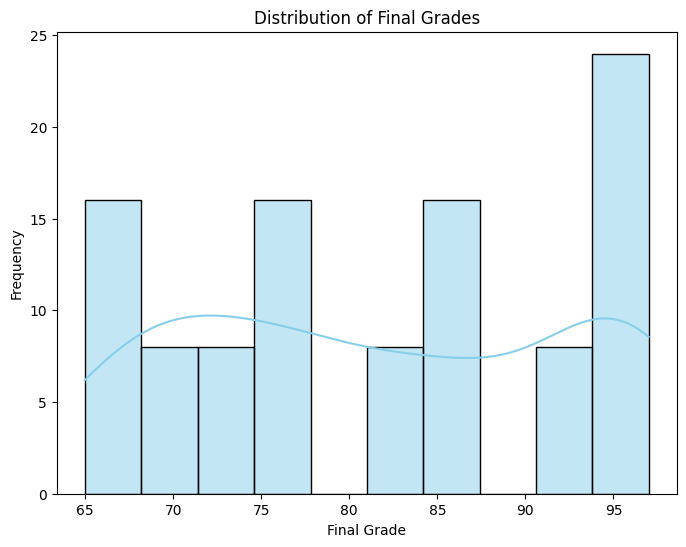

In [12]:
# Data Visualization: Distribution of Final Grades
plt.figure(figsize=(8,6))
sns.histplot(data['final_grade'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-48798db882dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pass_fail', data=data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


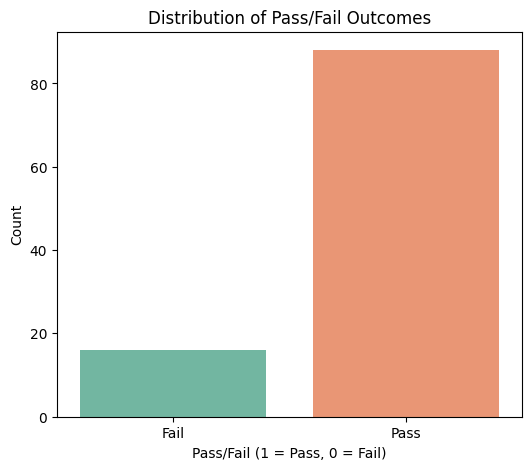

In [13]:
# Data Visualization: Pass/Fail Distribution
plt.figure(figsize=(6,5))
sns.countplot(x='pass_fail', data=data, palette='Set2')
plt.title('Distribution of Pass/Fail Outcomes')
plt.xlabel('Pass/Fail (1 = Pass, 0 = Fail)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Fail', 'Pass'])
plt.show()

In [14]:
# Features (exam scores) and target (pass/fail)
X = data[['exam1', 'exam2', 'exam3']]
y = data['pass_fail']

In [15]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        19

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



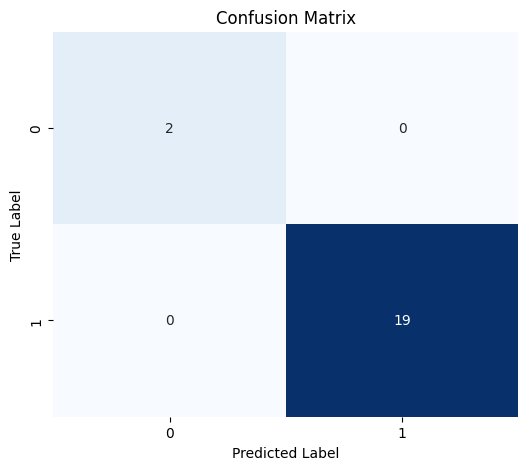

In [19]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()